In [4]:
!pip install tensorflow 
!pip install tensorflow-io tensorflow-addons
!pip install mido


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Attention, LayerNormalization
from tensorflow.keras.models import Model
import numpy as np
import mido
from tqdm import tqdm
import os

def load_midi_data(root_folder, num_samples=None):
    midi_data = []
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path)[:num_samples]:
                file_path = os.path.join(subfolder_path, file_name)
                print(file_path)
                try:
                    midi = mido.MidiFile(file_path)
                    notes = [note.note for track in midi.tracks for note in track if note.type == 'note_on']
                    midi_data.append(notes)
                except Exception as e:
                    print(f"Error loading MIDI file {file_path}: {e}")
                
    return midi_data

data_path = 'archive (3)'
midi_data = load_midi_data(data_path, num_samples=1000)  # Adjust the number of samples as needed

# Preprocess the MIDI data
vocab_size = 128  # MIDI note values range from 0 to 127
max_sequence_length = 500  # Adjust as needed
    


archive (3)\.38 Special\Caught Up In You.mid
archive (3)\.38 Special\Fantasy Girl.mid
archive (3)\10,000_Maniacs\A_Campfire_Song.mid
archive (3)\101_Strings\Theme_From_The_Godfather.mid
archive (3)\10cc\Dreadlock_Holiday.1.mid
archive (3)\10cc\Dreadlock_Holiday.2.mid
archive (3)\10cc\Dreadlock_Holiday.3.mid
archive (3)\10cc\Dreadlock_Holiday.4.mid
Error loading MIDI file archive (3)\10cc\Dreadlock_Holiday.4.mid: data byte must be in range 0..127
archive (3)\10cc\Dreadlock_Holiday.mid
archive (3)\10cc\Im_Not_In_Love.1.mid
archive (3)\10cc\Im_Not_In_Love.2.mid
archive (3)\10cc\Im_Not_In_Love.3.mid
archive (3)\10cc\Im_Not_In_Love.mid
archive (3)\10cc\The_Things_We_Do_for_Love.mid
archive (3)\1910_Fruitgum_Company\Simon_Says.1.mid
archive (3)\1910_Fruitgum_Company\Simon_Says.mid
archive (3)\20_Fingers\Lick_It.mid
archive (3)\20_Fingers\Short_Dick_Man.mid
archive (3)\2Boys\I_Wont_Let_You_Down.mid
archive (3)\2_Brothers_on_the_4th_Floor\Come_Take_My_Hand.mid
archive (3)\2_Brothers_on_the_4th

archive (3)\ABBA\I_Do,_I_Do,_I_Do,_I_Do.1.mid
archive (3)\ABBA\I_Do,_I_Do,_I_Do,_I_Do.2.mid
archive (3)\ABBA\I_Do,_I_Do,_I_Do,_I_Do.mid
archive (3)\ABBA\I_Have_a_Dream.1.mid
archive (3)\ABBA\I_Have_a_Dream.2.mid
archive (3)\ABBA\I_Have_a_Dream.3.mid
archive (3)\ABBA\I_Have_a_Dream.4.mid
archive (3)\ABBA\I_Have_a_Dream.5.mid
archive (3)\ABBA\I_Have_a_Dream.6.mid
archive (3)\ABBA\I_Have_a_Dream.mid
archive (3)\ABBA\I_Wonder_Departure_.mid
archive (3)\ABBA\Just_Like_That_Full_Sax_version_1983_.mid
archive (3)\ABBA\Kisses_of_Fire.1.mid
archive (3)\ABBA\Kisses_of_Fire.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.1.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.2.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.3.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.4.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.5.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.6.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.7.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.8.mid
archive (3)\ABBA\Knowing_Me,_Knowing_You.9.mid
arc

archive (3)\Adriano_Celentano\Una_carezza_in_un_pugno.mid
archive (3)\Adriano_Celentano\Una_festa_sui_prati.mid
archive (3)\Adventures_of_Stevie_V\Dirty_Cash_Dime_and_Dollar_mix_.mid
archive (3)\Aerosmith\Amazing.1.mid
archive (3)\Aerosmith\Amazing.mid
archive (3)\Aerosmith\Angel.mid
archive (3)\Aerosmith\Blind_Man.mid
archive (3)\Aerosmith\Boogie_Man.mid
archive (3)\Aerosmith\Crazy.1.mid
archive (3)\Aerosmith\Crazy.2.mid
archive (3)\Aerosmith\Crazy.mid
archive (3)\Aerosmith\Cryin.1.mid
archive (3)\Aerosmith\Cryin.mid
archive (3)\Aerosmith\Dream_On.1.mid
archive (3)\Aerosmith\Dream_On.mid
Error loading MIDI file archive (3)\Aerosmith\Dream_On.mid: data byte must be in range 0..127
archive (3)\Aerosmith\Dude_Looks_Like_A_Lady_.1.mid
archive (3)\Aerosmith\Dude_Looks_Like_A_Lady_.2.mid
archive (3)\Aerosmith\Dude_Looks_Like_A_Lady_.mid
archive (3)\Aerosmith\Eat_the_Rich.mid
archive (3)\Aerosmith\Falling_in_Love_Is_Hard_on_the_Knees_.1.mid
archive (3)\Aerosmith\Falling_in_Love_Is_Hard_on_th

archive (3)\Albert_Hammond\It_Never_Rains_In_Southern_California.1.mid
archive (3)\Albert_Hammond\It_Never_Rains_In_Southern_California.mid
archive (3)\Albert_West\For_the_Good_Times.mid
archive (3)\Alexander_O_Neal\Criticize.mid
archive (3)\Alexander_Peter\Hier_ist_ein_Mensch.mid
archive (3)\Alexandra\Sehnsucht_Das_Lied_der_Taiga_.mid
archive (3)\Alexia\Goodbye.mid
archive (3)\Alexia\Happy.mid
archive (3)\Alexia\Uh_lalala.mid
archive (3)\Alice\GEMINI-0-eternal.mid
archive (3)\Alice\Gnossienne_n._1.mid
archive (3)\Alice\Una_Notte_Speciale.mid
archive (3)\Alice_Cooper\Be_My_Lover.1.mid
archive (3)\Alice_Cooper\Be_My_Lover.2.mid
archive (3)\Alice_Cooper\Be_My_Lover.mid
archive (3)\Alice_Cooper\Billion_Dollar_Babies.1.mid
archive (3)\Alice_Cooper\Billion_Dollar_Babies.mid
archive (3)\Alice_Cooper\Caught_in_a_Dream.1.mid
archive (3)\Alice_Cooper\Caught_in_a_Dream.mid
archive (3)\Alice_Cooper\Eighteen.1.mid
archive (3)\Alice_Cooper\Eighteen.mid
archive (3)\Alice_Cooper\Elected.mid
archive (

In [6]:
import matplotlib.pyplot as plt

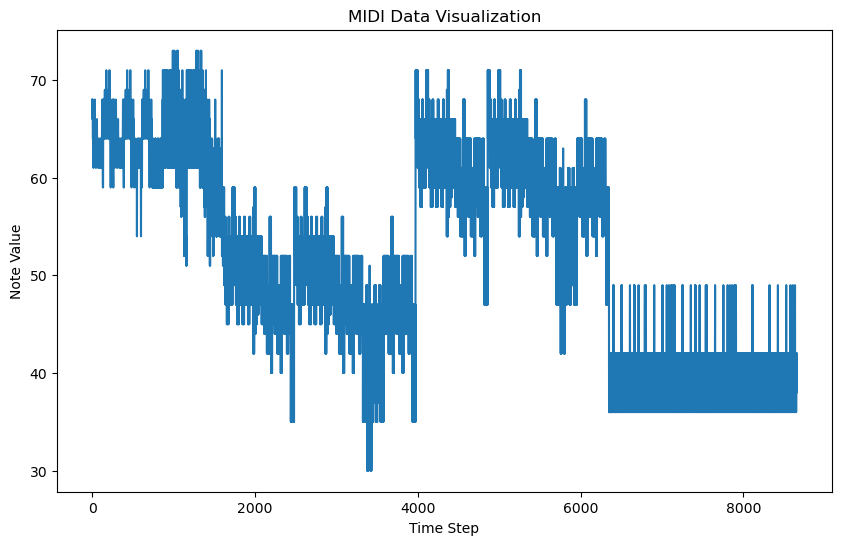

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(midi_data[0])  # Plotting the first sequence as an example
plt.title('MIDI Data Visualization')
plt.xlabel('Time Step')
plt.ylabel('Note Value')
plt.show()

# Preprocess the MIDI data
max_sequence_length = 500  # Adjust as needed
vocab_size = 128

In [8]:
from sklearn.model_selection import train_test_split
max_sequence_length = 500  # Adjust as needed
vocab_size = 128

def preprocess_data(data, vocab_size, max_sequence_length):
    processed_data = []
    for sequence in data:
        sequence = sequence[:max_sequence_length]
        processed_sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_sequence_length, padding='post')[0]
        processed_data.append(processed_sequence)
    return np.array(processed_data)

processed_data = preprocess_data(midi_data, vocab_size, max_sequence_length)

# Split the data into train and test sets
X_train, X_test = train_test_split(processed_data, test_size=0.2, random_state=42)

In [9]:
processed_data

array([[68, 68, 66, ..., 64, 64, 64],
       [52, 56, 59, ..., 66, 57, 63],
       [78, 74, 69, ..., 62, 59, 67],
       ...,
       [38, 43, 45, ..., 49, 38, 50],
       [76, 64, 64, ..., 76, 73, 76],
       [67, 67, 67, ..., 65, 64, 64]])

In [10]:
# Define the Music Transformer model
def create_transformer_model(vocab_size, max_sequence_length, d_model=256, n_heads=8, ff_dim=1024, dropout_rate=0.1):
    input_layer = Input(shape=(max_sequence_length,))
    x = Embedding(input_dim=vocab_size, output_dim=d_model)(input_layer)
    x = PositionalEncoding(max_sequence_length, d_model)(x)
    
    for _ in range(4):
        x = TransformerBlock(d_model, n_heads, ff_dim, dropout_rate)(x)
    
    x = Dense(vocab_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=x)
    return model



In [11]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.sequence_length = sequence_length
        self.d_model = d_model
        self.positional_encoding = self.get_positional_encoding(sequence_length, d_model)

    def get_positional_encoding(self, sequence_length, d_model):
        angle_rads = self.get_angles(np.arange(sequence_length)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
        # apply sin to even indices in the array
        sines = np.sin(angle_rads[:, 0::2])
        # apply cos to odd indices in the array
        cosines = np.cos(angle_rads[:, 1::2])

        pos_encoding = np.concatenate([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates
    
    def get_config(self):
        config = super(PositionalEncoding, self).get_config()
        config.update({
            'sequence_length': self.sequence_length,
            'd_model': self.d_model,
        })
        return config

    def call(self, inputs):
        return inputs + self.positional_encoding[:, :tf.shape(inputs)[1], :]
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [12]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.d_model = d_model
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate
        self.multi_head_attention = Attention(use_scale=True)
        self.dropout_1 = tf.keras.layers.Dropout(dropout_rate)
        self.layer_norm_1 = LayerNormalization(epsilon=1e-6)

        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(d_model),
        ])
        self.dropout_2 = tf.keras.layers.Dropout(dropout_rate)
        self.layer_norm_2 = LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        x = self.multi_head_attention([inputs, inputs, inputs])
        x = self.dropout_1(x)
        x = self.layer_norm_1(inputs + x)

        ffn_output = self.ffn(x)
        ffn_output = self.dropout_2(ffn_output)
        return self.layer_norm_2(x + ffn_output)
    
    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'd_model': self.d_model,
            'n_heads': self.n_heads,
            'ff_dim': self.ff_dim,
            'dropout_rate': self.dropout_rate,
            
            
        })
        return config
    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [13]:
model = create_transformer_model(vocab_size, max_sequence_length)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/10


18/18 [==============================] - 116s 6s/step - loss: 4.3393 - accuracy: 0.0384 - val_loss: 4.0889 - val_accuracy: 0.0180
Epoch 2/10
18/18 [==============================] - 95s 5s/step - loss: 4.0228 - accuracy: 0.0417 - val_loss: 4.0395 - val_accuracy: 0.0434
Epoch 3/10
18/18 [==============================] - 87s 5s/step - loss: 4.0063 - accuracy: 0.0417 - val_loss: 4.0181 - val_accuracy: 0.0434
Epoch 4/10
18/18 [==============================] - 96s 5s/step - loss: 3.9975 - accuracy: 0.0456 - val_loss: 4.0075 - val_accuracy: 0.0483
Epoch 5/10
18/18 [==============================] - 96s 5s/step - loss: 3.9326 - accuracy: 0.0591 - val_loss: 3.7725 - val_accuracy: 0.0735
Epoch 6/10
18/18 [==============================] - 96s 5s/step - loss: 2.9971 - accuracy: 0.2899 - val_loss: 1.2649 - val_accuracy: 0.7304
Epoch 7/10
18/18 [==============================] - 104s 6s/step - loss: 0.6667 - accuracy: 0.8631 - val_loss: 0.0880 - val_accuracy: 0.9860
Epoch 8/10
18/18

In [15]:
# Save the model to a file
model.save('music_transformer_model.h5')


C:\Users\khkir\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
with tf.keras.utils.custom_object_scope({'PositionalEncoding': PositionalEncoding, 'TransformerBlock': TransformerBlock}):
    loaded_model = tf.keras.models.load_model('music_transformer_model.h5',custom_objects={'PositionalEncoding': PositionalEncoding, 'TransformerBlock': TransformerBlock})

In [18]:
# Function to generate music using the trained model
def generate_music(model, start_sequence, num_steps=100, temperature=1.0):
    generated_sequence = start_sequence.copy()

    for _ in range(num_steps):
        # Predict the next note in the sequence
        predictions = model.predict(np.expand_dims(generated_sequence[-max_sequence_length:], axis=0))
        predicted_note = np.argmax(predictions[:, -1, :])

        # Add the predicted note to the sequence
        generated_sequence = np.append(generated_sequence, predicted_note)

    return generated_sequence


In [19]:
start_sequence = np.random.randint(0, vocab_size, size=(max_sequence_length,))
generated_music = generate_music(model, start_sequence, num_steps=200)

# Convert the generated music sequence to MIDI format and save it
output_midi = np.clip(generated_music, 0, vocab_size - 1).astype(int)
output_midi_file = mido.MidiFile()
output_track = mido.MidiTrack()
output_midi_file.tracks.append(output_track)

for note_value in output_midi:
    output_track.append(mido.Message('note_on', note=note_value, velocity=64, time=100))

output_midi_file.save('generated_music.mid')

1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 110ms/step
